In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [3]:
house_price_predictions = pd.read_excel(r"C:\Users\Arsha\Desktop\ML Project\House_Rent_Train.xlsx")

In [5]:
house_price_predictions.info

<bound method DataFrame.info of                                      id  type       locality  \
0      ff8081815733a243015733b2876600a6  BHK2            NaN   
1      ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur   
2      ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur   
3      ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe   
4      ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli   
...                                 ...   ...            ...   
20550                                19   NaN            NaN   
20551                                20  BHK2            NaN   
20552                                21  BHK2            NaN   
20553                                22  BHK2            NaN   
20554                                23  BHK1            NaN   

           activation_date   latitude  longitude lease_type  gym  lift  \
0         21-04-2018 14:44  12.934471  77.634471     FAMILY    1     1   
1      2017-09-10 12:48:00  12.929557  77.672280   

In [6]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [7]:
house_price_predictions.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

<Axes: >

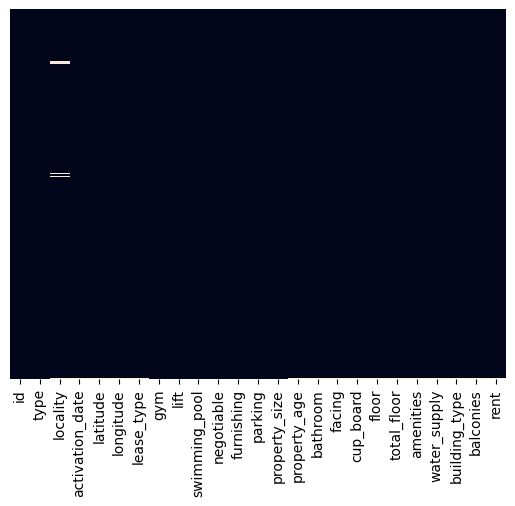

In [8]:
sns.heatmap(house_price_predictions.isnull(),yticklabels=False,cbar=False)

In [9]:
house_price_predictions.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [10]:
house_price_predictions.shape

(20555, 25)

In [11]:
house_price_predictions.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [12]:
house_price_predictions[~house_price_predictions["property_age"].isnull()].isnull().sum()

id                   0
type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [13]:
house_price_predictions.dropna(subset=["property_age"], inplace=True)
house_price_predictions["locality"].fillna(method='bfill', inplace=True)

In [14]:
house_price_predictions["type"].value_counts()

BHK2        11671
BHK3         4387
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [15]:
type_mapping = {'BHK1':'BHK1' , 'BHK2': 'BHK2', 'BHK3': 'BHK3', 'RK1':'RK1', 'BHK4': 'BHK4', 'BHK4PLUS': 'BHK4', '1BHK1': 'BHK1', 'bhk2':'BHK2', 'bhk3':'BHK3'}
house_price_predictions['type'] = house_price_predictions['type'].map(type_mapping)

In [16]:
house_price_predictions["type"].value_counts()

BHK2    11687
BHK3     4399
BHK1     3611
RK1       553
BHK4      264
Name: type, dtype: int64

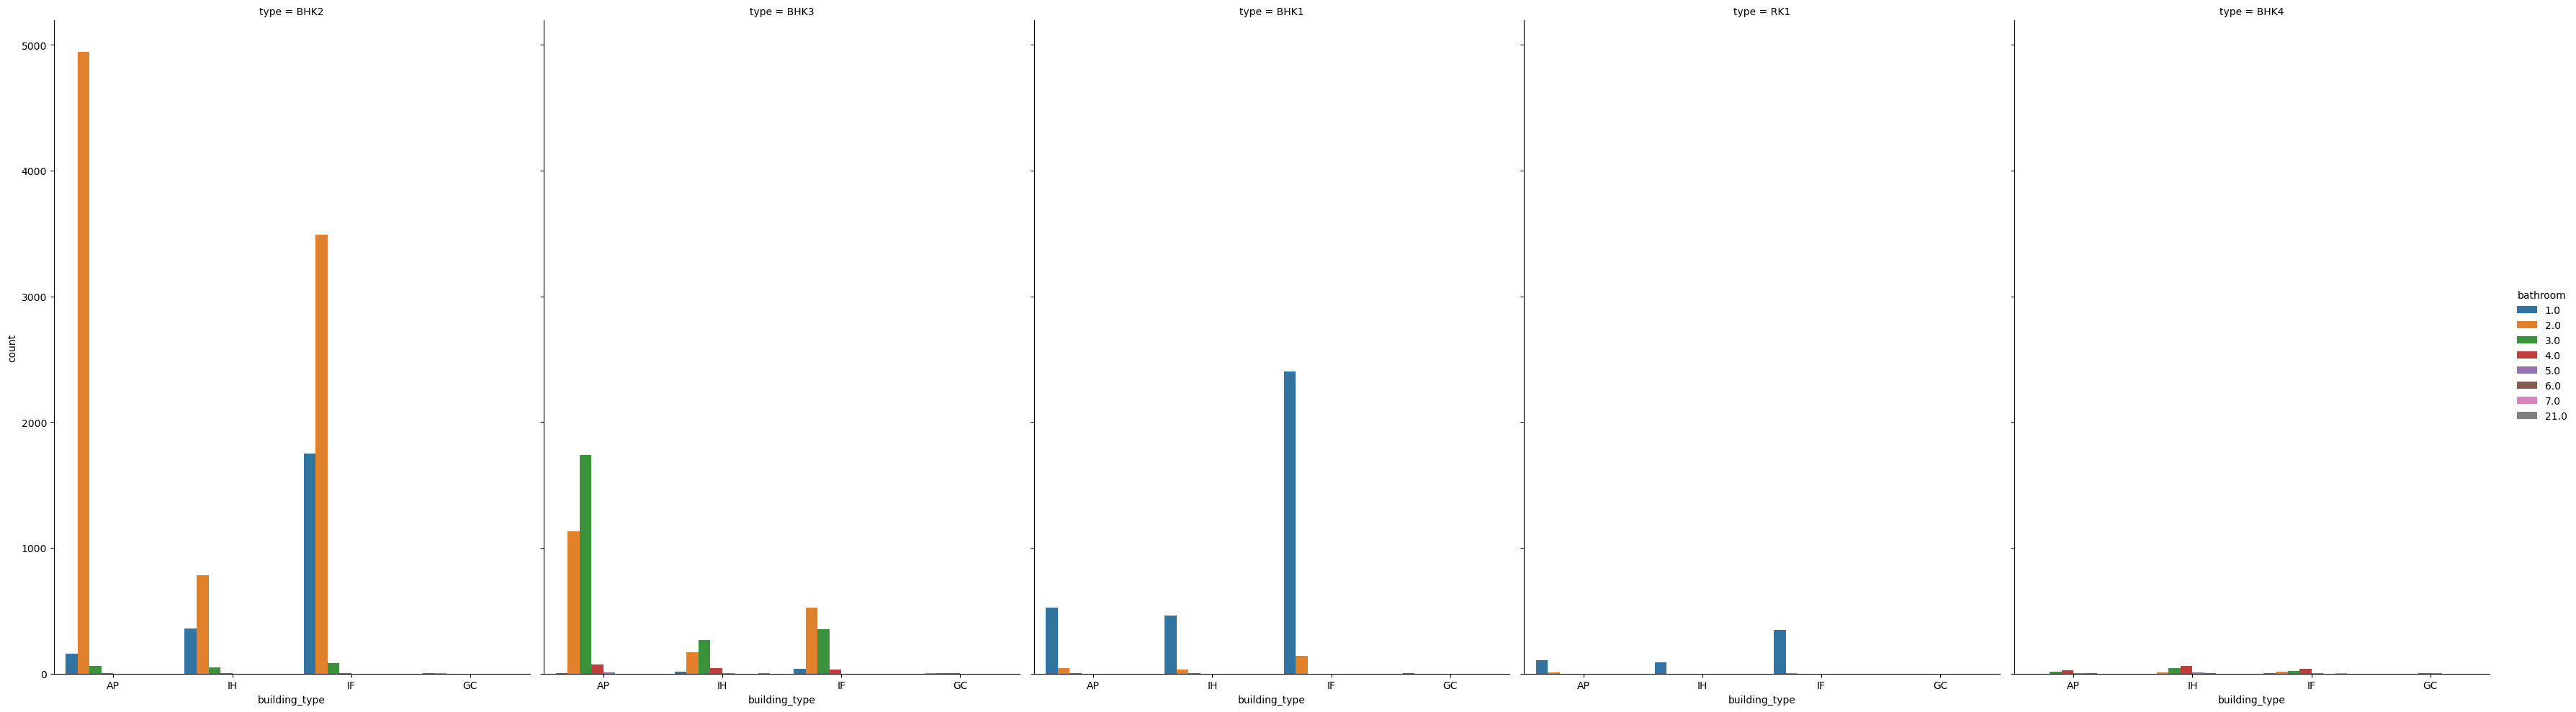

In [17]:
sns.catplot(data=house_price_predictions, x="building_type", hue="bathroom", col="type", kind="count", height=10, aspect=0.7)
plt.show()

In [18]:
house_price_predictions[house_price_predictions["type"].isnull()]["bathroom"].value_counts()

3.0    12
2.0     6
Name: bathroom, dtype: int64

In [19]:
house_price_predictions['type'] = house_price_predictions.apply(lambda row: 'BHK2' if pd.isnull(row['type']) and row['bathroom'] == 2 else ('BHK3' if pd.isnull(row['type']) and row['bathroom'] == 3 else row['type']), axis=1)


In [20]:
house_price_predictions.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [21]:
house_price_predictions['bathroom'].value_counts()

2.0     11298
1.0      6262
3.0      2647
4.0       287
5.0        33
6.0         3
21.0        1
7.0         1
Name: bathroom, dtype: int64

In [22]:
house_price_predictions["bathroom"] = house_price_predictions["bathroom"].map({2.0:2, 1.0:1, 3.0: 3, 4.0:4, 5.0:5,6.0:5, 7.0:5,21.0:5})

In [23]:
house_price_predictions['bathroom'].value_counts()

2    11298
1     6262
3     2647
4      287
5       38
Name: bathroom, dtype: int64

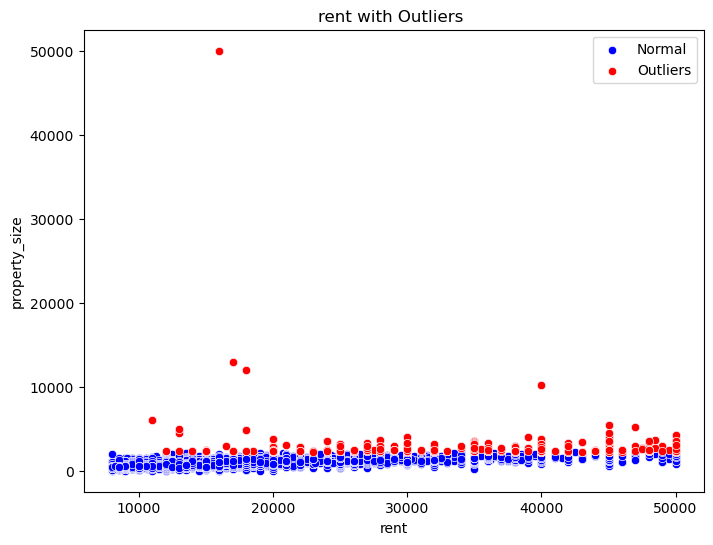

In [24]:
col = "rent"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=col, y="property_size", data=house_price_predictions, color='blue', label='Normal')

# Identify and highlight outliers in red
outliers = house_price_predictions[(np.abs(house_price_predictions["property_size"] - house_price_predictions["property_size"].mean()) > 2 * house_price_predictions["property_size"].std())]
sns.scatterplot(x=col, y="property_size", data=outliers, color='red', label='Outliers')

# Customize the plot
plt.xlabel(col)
plt.ylabel("property_size")
plt.title(f'{col} with Outliers ')
plt.legend()
plt.show()

In [25]:
from scipy.stats.mstats import winsorize
house_price_predictions['property_size'] = winsorize(house_price_predictions['property_size'], limits=[None, 0.05])

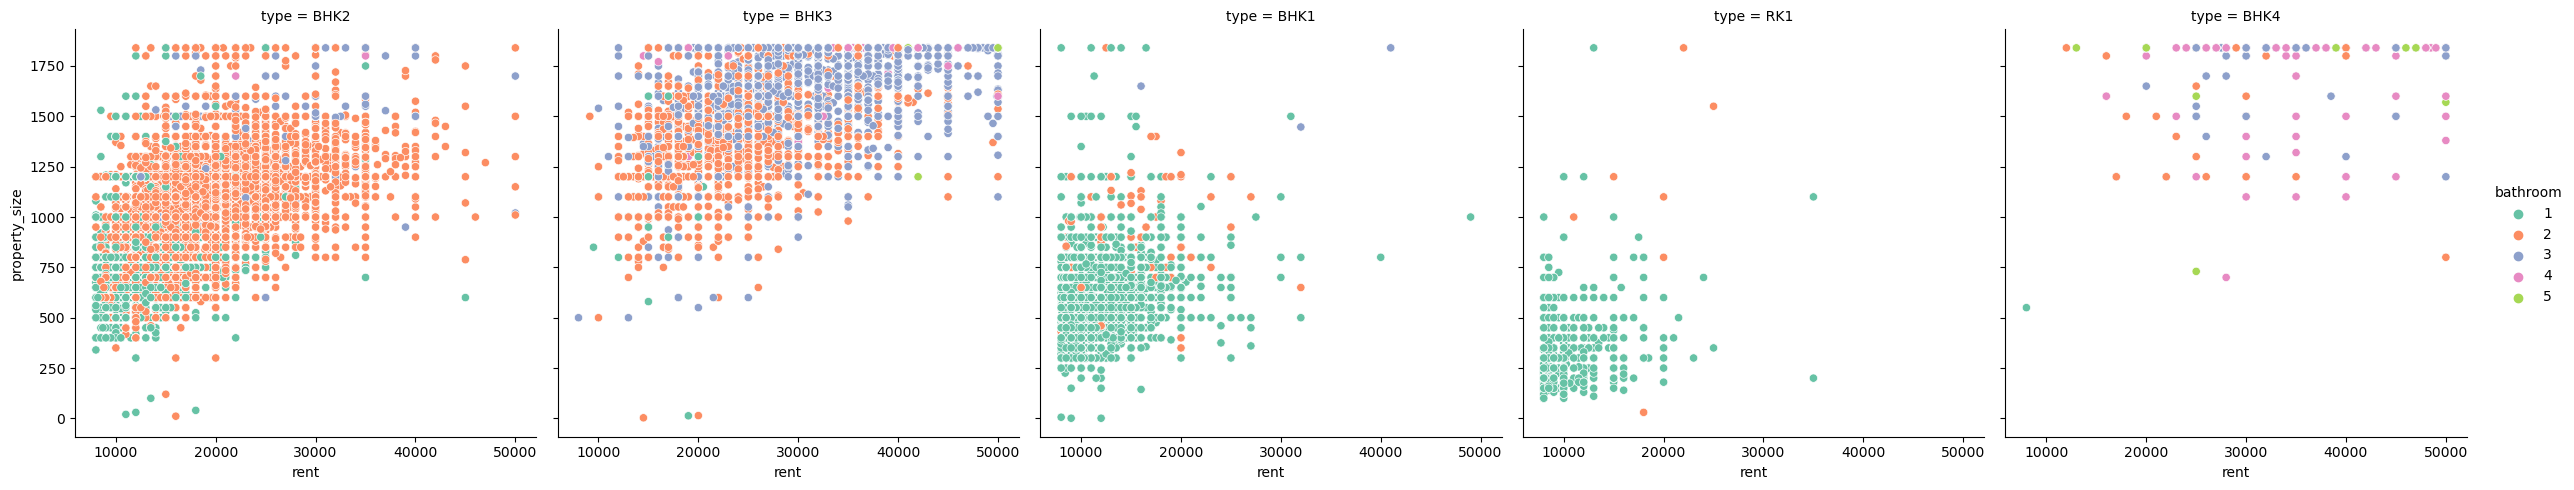

In [26]:
sns.relplot(data=house_price_predictions, x="rent", y="property_size", hue='bathroom', col="type", palette="Set2")
plt.show()

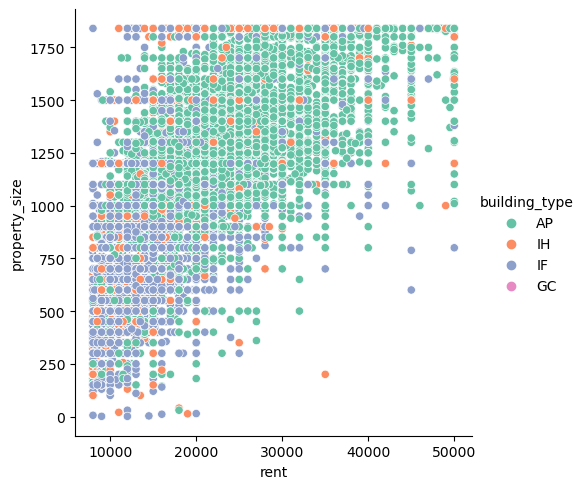

In [62]:
sns.relplot(data=house_price_predictions, x="rent", y="property_size", hue="building_type", palette="Set2")
plt.show()

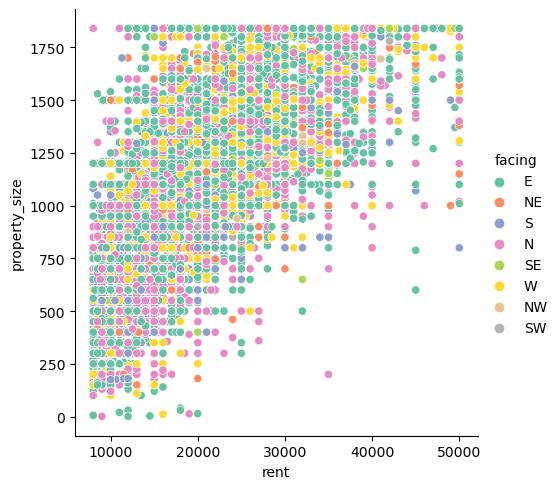

In [27]:
sns.relplot(data=house_price_predictions, x="rent", y="property_size", hue="facing",  palette="Set2")
plt.show()

In [28]:
correlation = house_price_predictions['property_size'].corr(house_price_predictions['rent'])

print("Correlation between property size and rent price:", correlation)

Correlation between property size and rent price: 0.7576518517438755


In [29]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [30]:
import json
# Assuming your DataFrame is named 'data' and the column is named 'amenities_column'
house_price_predictions['amenities_column'] = house_price_predictions['amenities'].apply(json.loads)

# Convert the dictionary-like strings into separate columns
amenities_df = pd.json_normalize(house_price_predictions['amenities_column'])

# Concatenate the new columns with the original DataFrame
house_price_predictions = pd.concat([house_price_predictions, amenities_df], axis=1)

In [31]:
house_price_predictions.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815733a243015733b2876600a6,BHK2,Bellandur,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,False,True,True,True,False,True,True,False,True,True
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,False,True,True,False,True,True,True,False,True,True
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,False,False,True,False,True,False,False,False,True,True
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,False,False,False,False,True,False,False,False,False,True


In [33]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent',
       'amenities_column', 'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM',
       'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH',
       'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [ ]:
LIFT: true (indicating the presence of a lift) 

GYM: true (indicating the presence of a gym) 

INTERNET: true (indicating the availability of internet) 

AC: false (indicating the absence of air conditioning) 

CLUB: true (indicating the presence of a club) 

INTERCOM: true (indicating the presence of an intercom system) 

POOL: true (indicating the presence of a pool) 

CPA: true (indicating the presence of covered parking) 

FS: true (indicating the availability of fire safety measures)

SERVANT: false (indicating the absence of a servant quarter) 

SECURITY: true (indicating the presence of security measures) 

SC: true (indicating the availability of shopping complex nearby) 

GP: true (indicating the presence of a gas pipeline) 

PARK: false (indicating the absence of a parking facility) 

RWH: true (indicating the presence of a rainwater harvesting system) 

STP: true (indicating the presence of a sewage treatment plant) 

HK: false (indicating the absence of housekeeping services) 

PB: true (indicating the presence of a power backup) 

VP: true (indicating the availability of visitor parking) 

In [34]:
house_price_predictions.drop(columns = ['LIFT', 'GYM', 'INTERNET', 'CLUB', 'INTERCOM',
       'POOL', 'CPA','SERVANT', 'SECURITY', 'PARK', 'RWH',
       'STP', 'HK', "GP",'VP'], inplace = True)

In [35]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent',
       'amenities_column', 'AC', 'FS', 'SC', 'PB'],
      dtype='object')

In [36]:
features = [ 'AC', 'FS', 'SC','PB','gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'floor', 'parking']

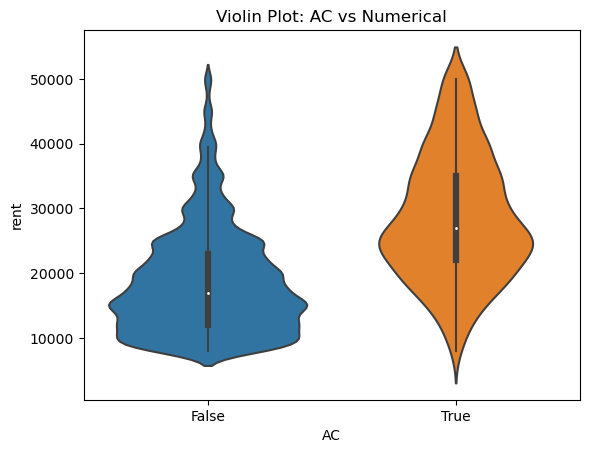

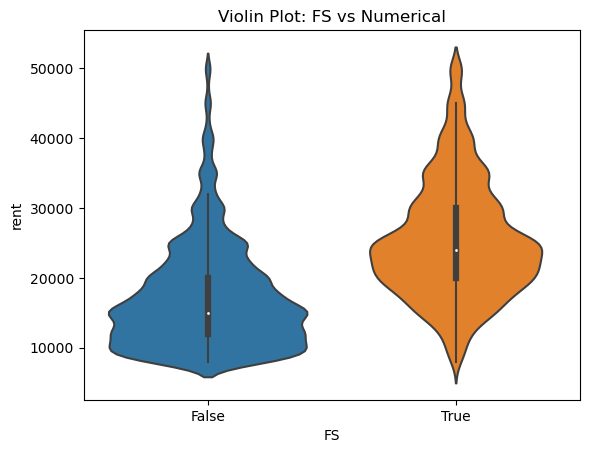

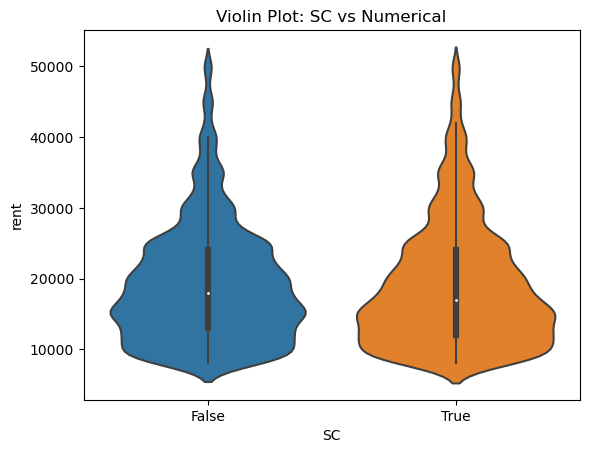

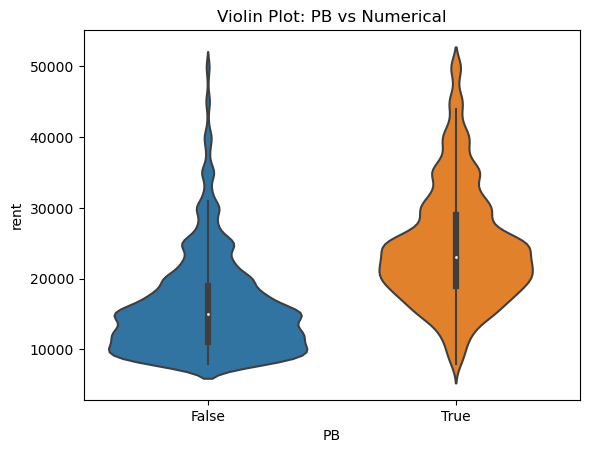

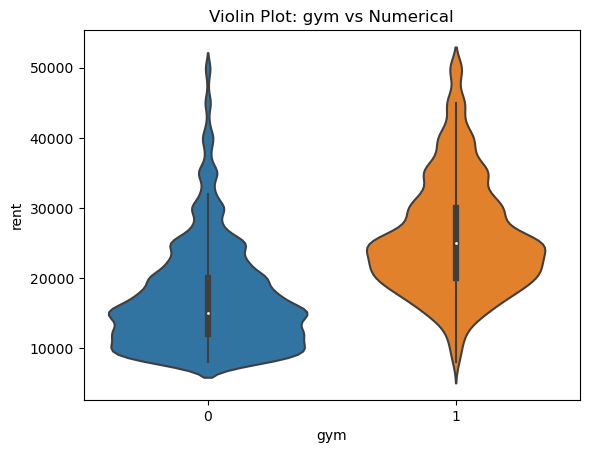

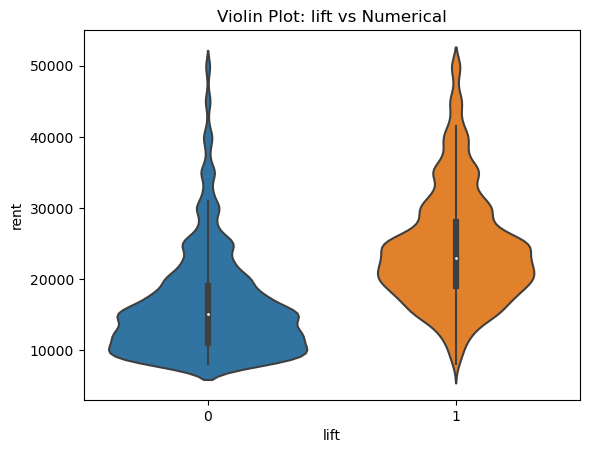

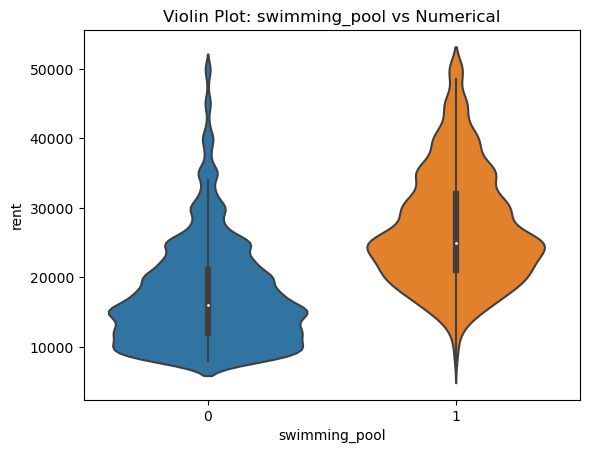

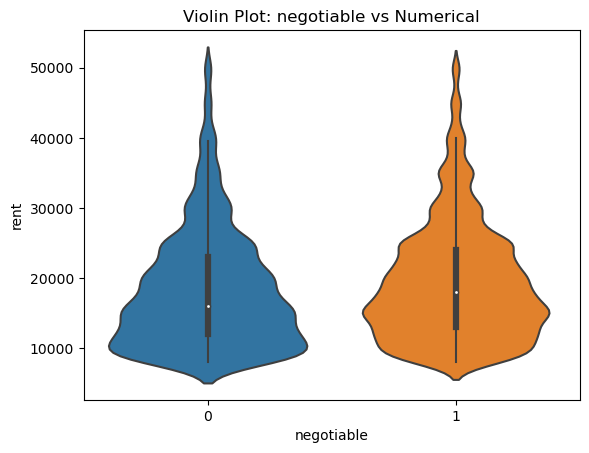

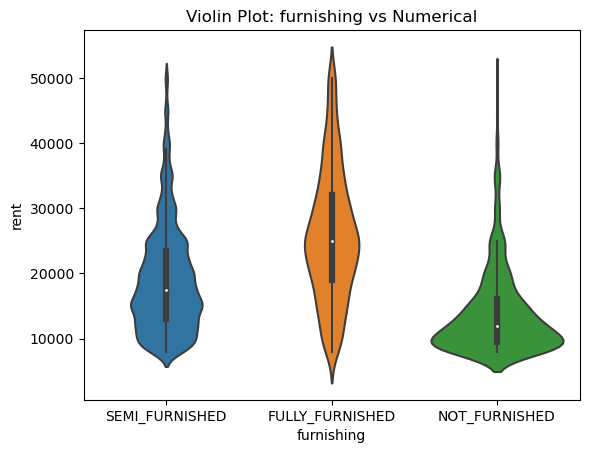

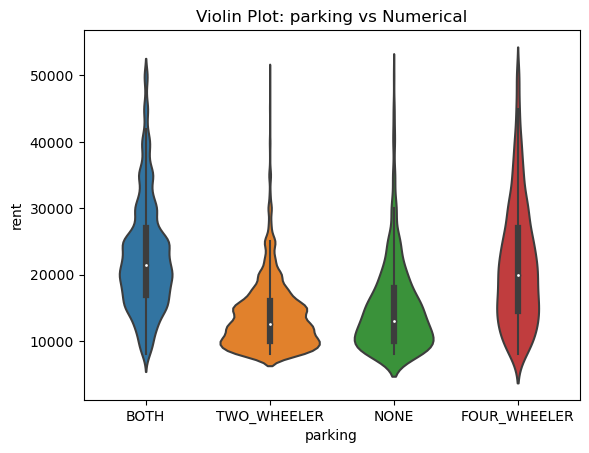

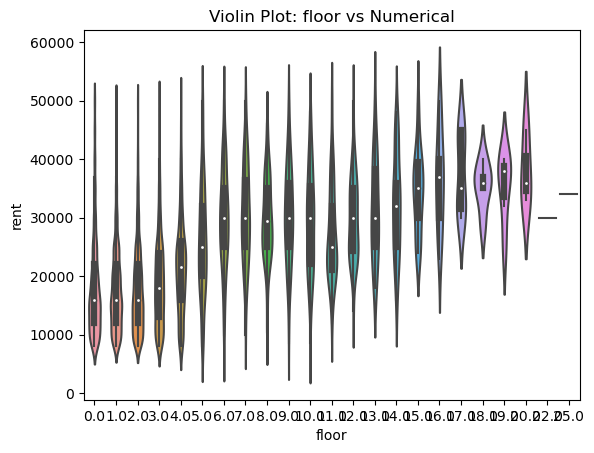

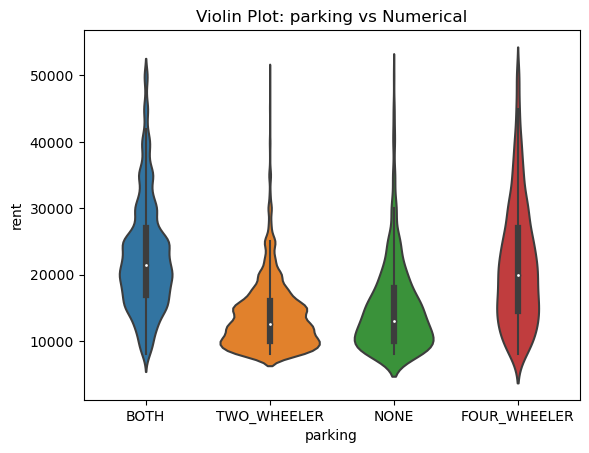

In [37]:
for col in features:
    sns.violinplot(x=col, y="rent", data=house_price_predictions)
    plt.xlabel(f"{col}")
    plt.ylabel("rent")
    plt.title(f'Violin Plot: {col} vs Numerical')
    plt.show()

In [38]:
house_price_predictions['activation_date'] = pd.to_datetime(house_price_predictions['activation_date'],errors='coerce')

house_price_predictions['year'] = house_price_predictions['activation_date'].dt.year
house_price_predictions['month'] = house_price_predictions['activation_date'].dt.month
house_price_predictions['day'] = house_price_predictions['activation_date'].dt.day


In [39]:
house_price_predictions["year"].value_counts()

2018    13073
2017     7459
Name: year, dtype: int64

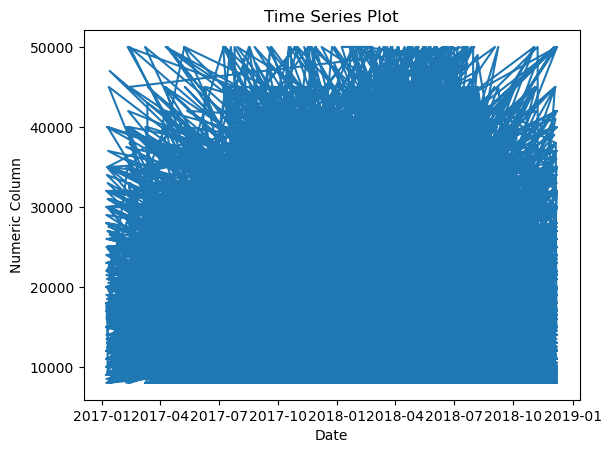

In [40]:
plt.plot(house_price_predictions['activation_date'], house_price_predictions['rent'])
plt.xlabel('Date')
plt.ylabel('Numeric Column')
plt.title('Time Series Plot')
plt.show()

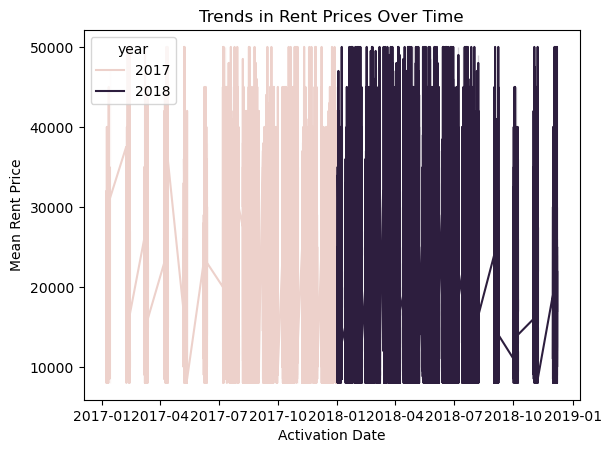

In [45]:
average_rent_by_month = house_price_predictions.groupby(['year', 'month'])['rent'].mean().reset_index()
sns.lineplot(x='activation_date', y='rent', data=house_price_predictions, hue = "year")
plt.xlabel('Activation Date')
plt.ylabel('Mean Rent Price')
plt.title('Trends in Rent Prices Over Time')
plt.show()

In [42]:
for col in features:
    average_rent_with_gym = house_price_predictions[house_price_predictions[col] == True]['rent'].mean()
    average_rent_without_gym = house_price_predictions[house_price_predictions[col] == False]['rent'].mean()
    print(f"Average rent with {col}: {average_rent_with_gym}")
    print(f"Average rent without {col}: {average_rent_without_gym}")
    print()


Average rent with AC: 28433.71298405467
Average rent without AC: 18637.836827108986

Average rent with FS: 25299.2423490488
Average rent without FS: 17133.39124617737

Average rent with SC: 18969.47376033058
Average rent without SC: 19134.56865093992

Average rent with PB: 24425.08514323784
Average rent without PB: 15963.965686650803

Average rent with gym: 25776.024903392015
Average rent without gym: 17085.052349754314

Average rent with lift: 24230.730479267637
Average rent without lift: 16123.853708791208

Average rent with swimming_pool: 27017.640668523676
Average rent without swimming_pool: 17369.821449651754

Average rent with negotiable: 19392.196646132787
Average rent without negotiable: 18229.120567375885

Average rent with furnishing: nan
Average rent without furnishing: nan

Average rent with parking: nan
Average rent without parking: nan

Average rent with floor: 18037.38538657604
Average rent without floor: 17953.026669340285

Average rent with parking: nan
Average rent wi

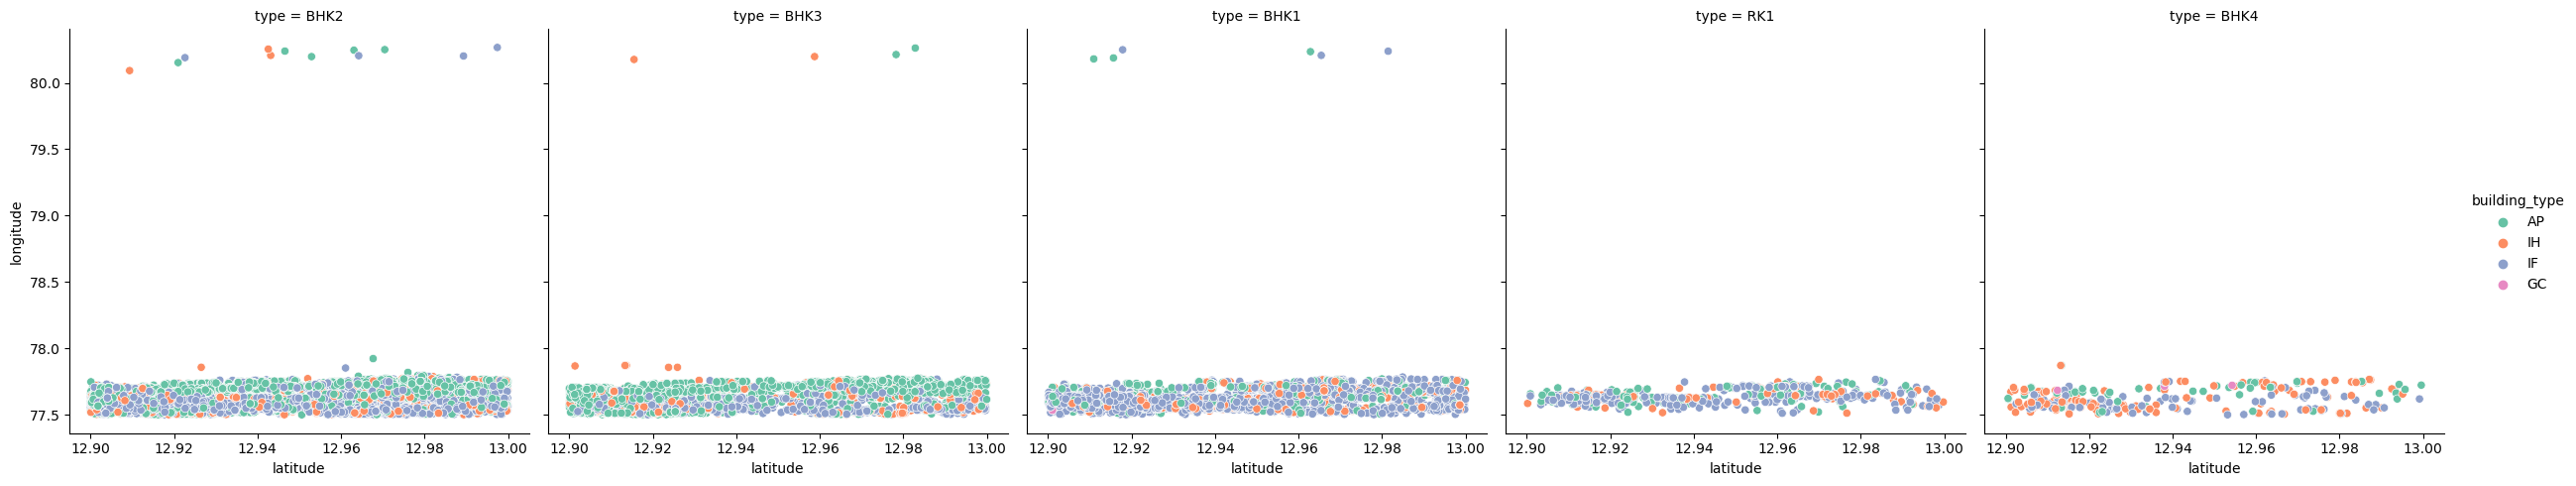

In [43]:
# sns.scatterplot(x='latitude', y='longitude', data=data, color='blue', label='Normal')
sns.relplot(data=house_price_predictions, x='latitude', y='longitude', col = "type",hue = 'building_type', palette="Set2")
plt.show()

In [47]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent',
       'amenities_column', 'AC', 'FS', 'SC', 'PB', 'year', 'month', 'day'],
      dtype='object')

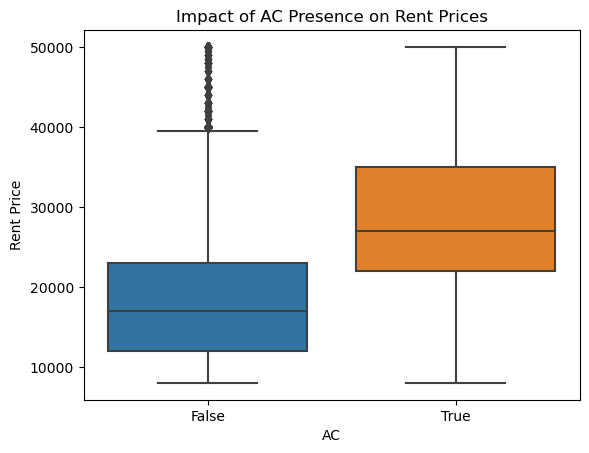

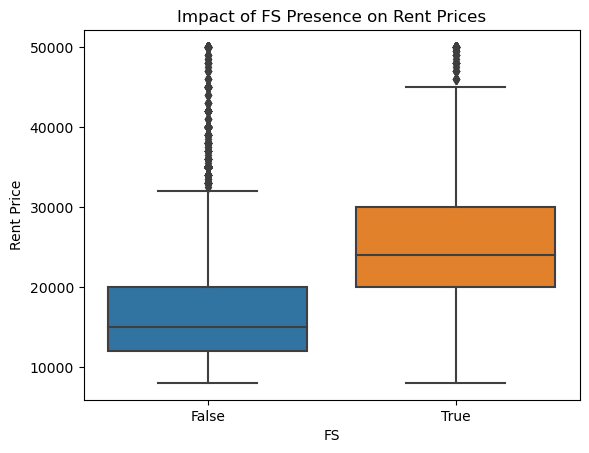

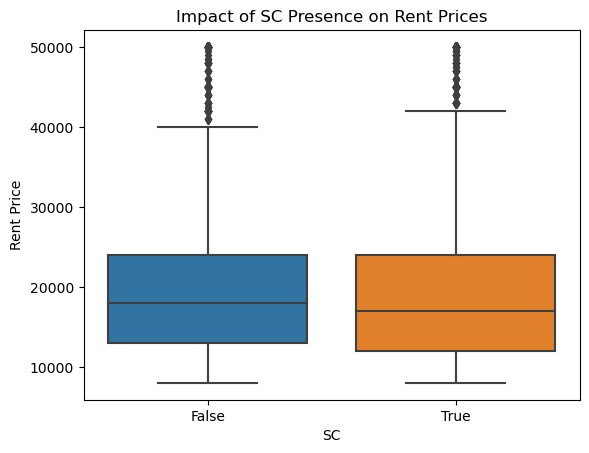

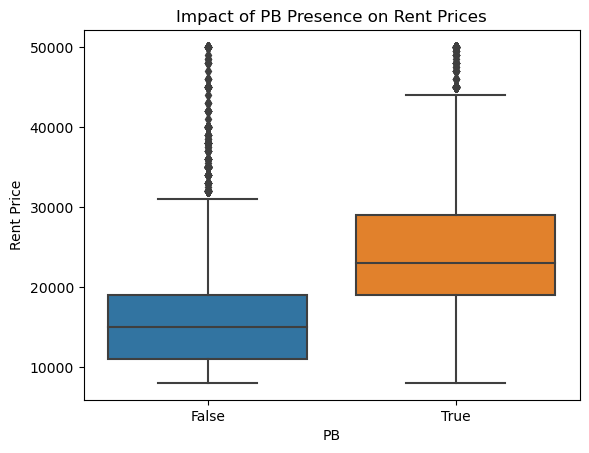

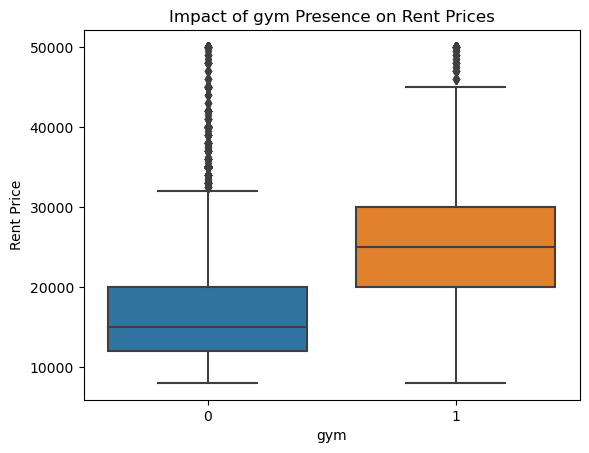

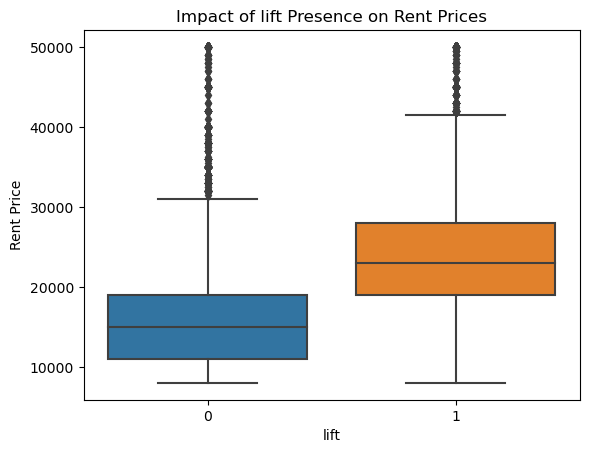

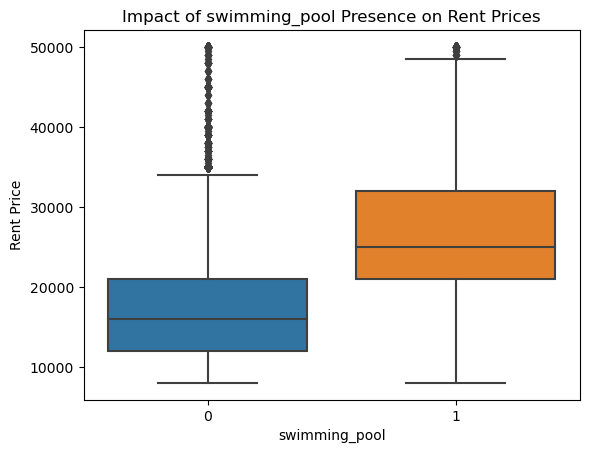

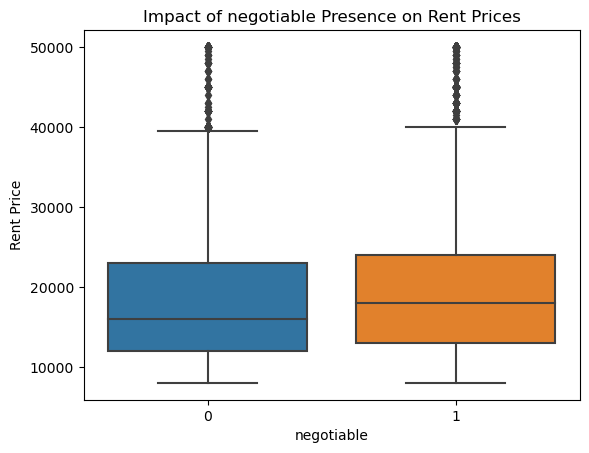

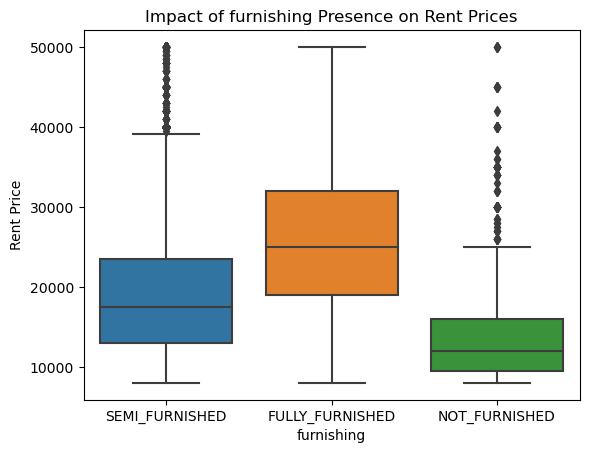

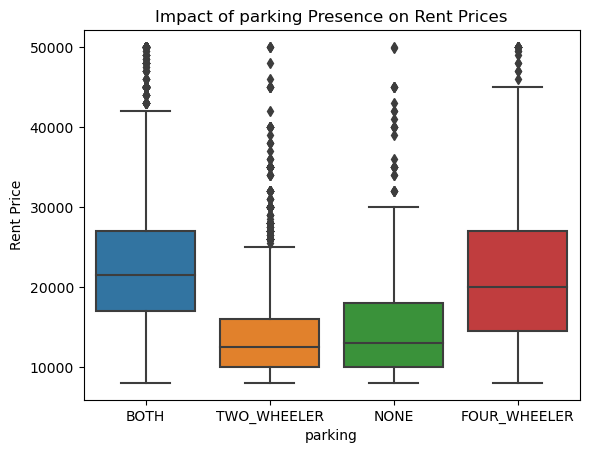

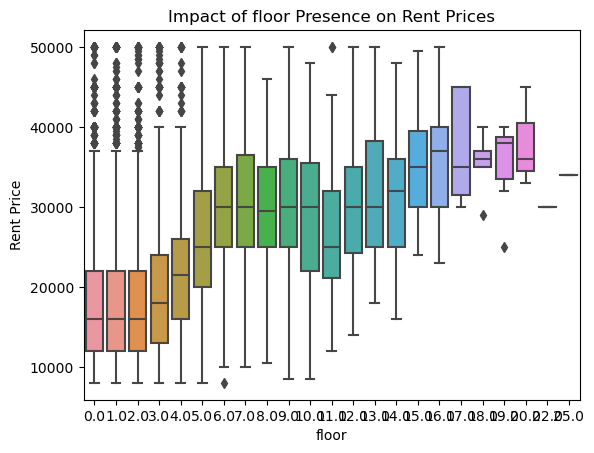

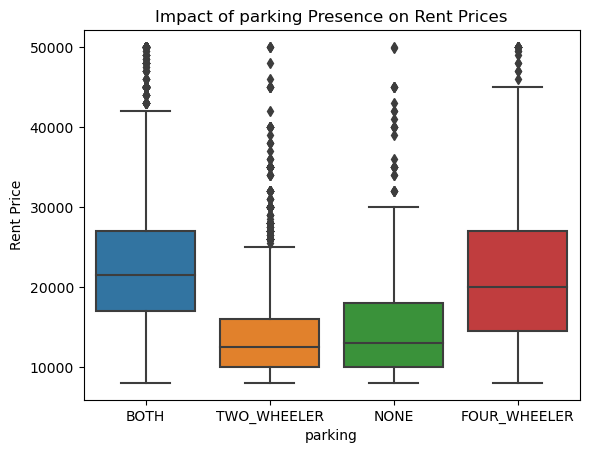

In [48]:
for col in features:
    sns.boxplot(x=col, y='rent', data=house_price_predictions)
    plt.xlabel(f"{col}")
    plt.ylabel('Rent Price')
    plt.title(f'Impact of {col} Presence on Rent Prices')
    plt.show()

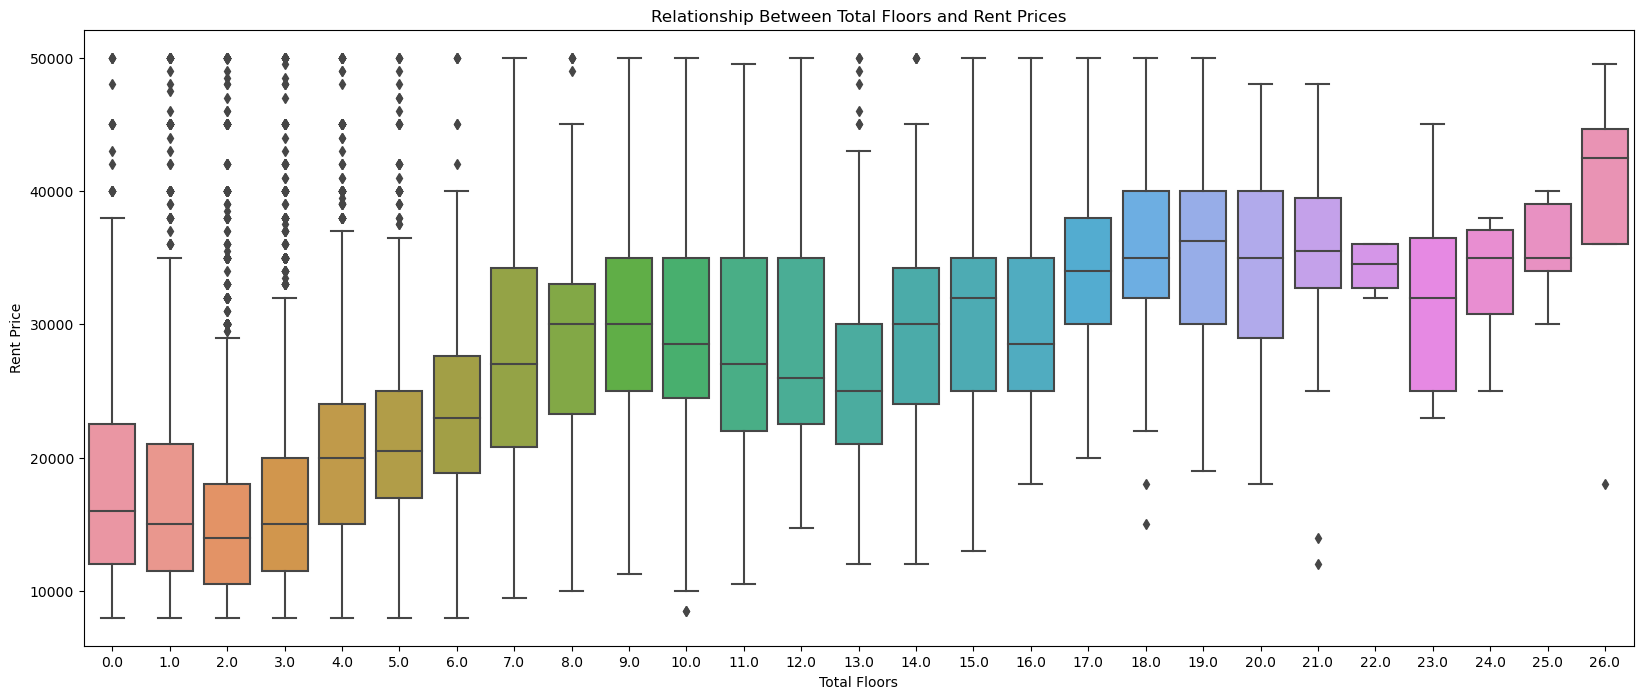

In [49]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='total_floor', y='rent', data=house_price_predictions)
plt.xlabel('Total Floors')
plt.ylabel('Rent Price')
plt.title('Relationship Between Total Floors and Rent Prices')
plt.show()

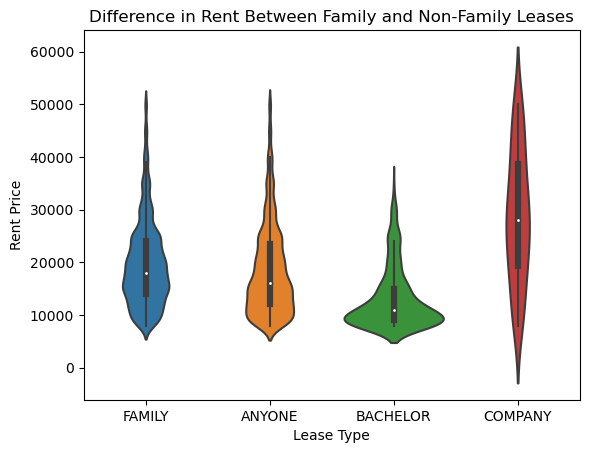

In [50]:
sns.violinplot(x='lease_type', y='rent', data=house_price_predictions)
plt.xlabel('Lease Type')
plt.ylabel('Rent Price')
plt.title('Difference in Rent Between Family and Non-Family Leases')
plt.show()

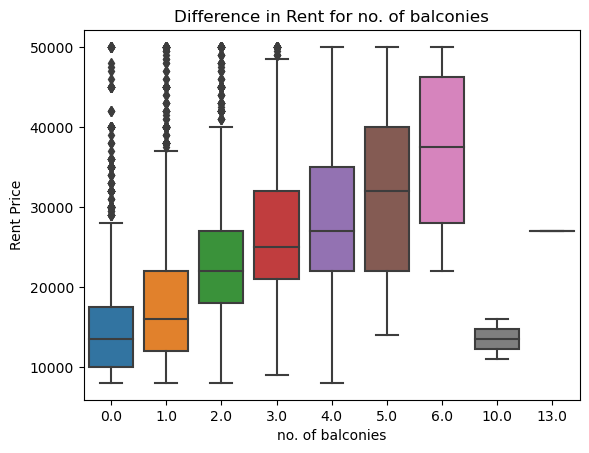

In [51]:
sns.boxplot(x='balconies', y='rent', data=house_price_predictions)
plt.xlabel('no. of balconies')
plt.ylabel('Rent Price')
plt.title('Difference in Rent for no. of balconies')
plt.show()

In [52]:
house_price_predictions.corr()

C:\Users\Arsha\AppData\Local\Temp\ipykernel_12240\1835629031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_price_predictions.corr()


,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,...,total_floor,balconies,rent,AC,FS,SC,PB,year,month,day
latitude,1.000000,0.194640,0.034994,0.019427,0.034925,-0.009021,0.018551,0.030712,-0.008402,-0.003164,...,-0.000630,0.049354,0.032816,0.002805,0.022061,-0.008239,0.042635,0.033520,-0.007403,-0.004198
longitude,0.194640,1.000000,0.245629,0.208098,0.229410,-0.024615,0.104083,-0.136020,0.097732,-0.004139,...,0.201795,0.164931,0.163751,0.072946,0.207883,-0.010024,0.255954,0.026335,-0.007907,-0.010066
gym,0.034994,0.245629,1.000000,0.645186,0.769262,0.008599,0.407112,-0.179898,0.334420,-0.002622,...,0.526395,0.415595,0.431574,0.162560,0.580707,-0.010031,0.587141,0.008267,-0.015945,-0.005325
lift,0.019427,0.208098,0.645186,1.000000,0.564442,0.011062,0.454806,-0.180953,0.374752,-0.003868,...,0.530756,0.525742,0.461887,0.151977,0.570760,-0.062336,0.711159,-0.009380,-0.013769,-0.000939
swimming_pool,0.034925,0.229410,0.769262,0.564442,1.000000,0.010318,0.392520,-0.167397,0.327487,-0.002194,...,0.574590,0.382949,0.434513,0.177760,0.573061,0.017329,0.526329,0.006452,-0.008804,0.004723
negotiable,-0.009021,-0.024615,0.008599,0.011062,0.010318,1.000000,0.066709,0.039044,0.059790,0.004697,...,-0.002279,0.026671,0.062476,0.007035,0.029348,0.038977,0.025818,0.001703,0.005679,-0.001601
property_size,0.018551,0.104083,0.407112,0.454806,0.392520,0.066709,1.000000,-0.010970,0.770791,-0.003566,...,0.325894,0.517184,0.757652,0.168669,0.375385,-0.030027,0.467575,-0.026231,-0.003779,-0.000996
property_age,0.030712,-0.136020,-0.179898,-0.180953,-0.167397,0.039044,-0.010970,1.000000,-0.047905,0.004559,...,-0.231069,-0.108418,-0.010644,-0.009248,-0.152253,0.001662,-0.167229,-0.010016,-0.013574,0.002261
bathroom,-0.008402,0.097732,0.334420,0.374752,0.327487,0.059790,0.770791,-0.047905,1.000000,-0.006488,...,0.271204,0.443898,0.689020,0.150588,0.312346,-0.015118,0.391183,-0.025466,-0.005019,-0.004716
cup_board,-0.003164,-0.004139,-0.002622,-0.003868,-0.002194,0.004697,-0.003566,0.004559,-0.006488,1.000000,...,-0.003156,-0.006551,-0.001246,-0.000896,-0.002807,0.007271,-0.003883,0.005422,-0.009403,-0.006546


In [53]:
house_price_predictions["facing"].value_counts()

E     9534
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: facing, dtype: int64

In [54]:
house_price_predictions.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,balconies,rent,amenities_column,AC,FS,SC,PB,year,month,day
0,ff8081815733a243015733b2876600a6,BHK2,Bellandur,2018-04-21 14:44:00,12.934471,77.634471,FAMILY,1,1,1,...,2.0,40000.0,"{'LIFT': True, 'GYM': True, 'INTERNET': True, ...",False,True,True,True,2018,4,21
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,22000.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",False,False,True,True,2017,9,10
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,28000.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",False,False,True,True,2018,12,6
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,...,0.0,8000.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",False,False,False,False,2018,7,20
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,...,1.0,45000.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",False,False,False,False,2018,5,31


In [55]:
location_column = house_price_predictions['locality']

# Calculate the frequency of each unique location name
location_counts = location_column.value_counts()

# Create labels based on frequency
label_mapping = {}
for location, count in zip(location_counts.index, location_counts):
    label_mapping[location] = count

house_price_predictions['locality'] = location_column.map(label_mapping)

In [56]:
house_price_predictions["type"].value_counts()

BHK2    11693
BHK3     4411
BHK1     3611
RK1       553
BHK4      264
Name: type, dtype: int64

In [57]:
house_price_predictions["type"] = house_price_predictions["type"].map({"RK1":0, "BHK1":1, "BHK2":2, "BHK3":3, "BHK4":4})

In [58]:
for col in ["AC","FS","SC","PB"]:
    house_price_predictions[col] = house_price_predictions[col].map({True:1, False:0})

In [59]:
house_price_predictions.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,balconies,rent,amenities_column,AC,FS,SC,PB,year,month,day
0,ff8081815733a243015733b2876600a6,2,441,2018-04-21 14:44:00,12.934471,77.634471,FAMILY,1,1,1,...,2.0,40000.0,"{'LIFT': True, 'GYM': True, 'INTERNET': True, ...",0,1,1,1,2018,4,21
1,ff8081815ee25e15015ee50004da2acd,2,441,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,22000.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",0,0,1,1,2017,9,10
2,ff80818163f29c9e0163f46770b873e7,3,1,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,28000.0,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",0,0,1,1,2018,12,6
3,ff80818164b68a700164b74b1b247a1d,1,49,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,...,0.0,8000.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",0,0,0,0,2018,7,20
4,ff80818163b1faf00163b4b9b8a163b1,3,93,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,...,1.0,45000.0,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",0,0,0,0,2018,5,31


In [60]:
# f = data["latitude"].value_counts().head(20).index.tolist()
# data[data["latitude"].isin(f)]["locality"].value_counts()

In [61]:
house_price_predictions.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent',
       'amenities_column', 'AC', 'FS', 'SC', 'PB', 'year', 'month', 'day'],
      dtype='object')

In [62]:
house_price_predictions.drop(columns = ['id','activation_date', 'amenities', 'amenities_column'], inplace = True)

In [63]:
house_price_predictions.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,building_type,balconies,rent,AC,FS,SC,PB,year,month,day
0,2,441,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,AP,2.0,40000.0,0,1,1,1,2018,4,21
1,2,441,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,AP,2.0,22000.0,0,0,1,1,2017,9,10
2,3,1,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,AP,3.0,28000.0,0,0,1,1,2018,12,6
3,1,49,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,IH,0.0,8000.0,0,0,0,0,2018,7,20
4,3,93,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,IH,1.0,45000.0,0,0,0,0,2018,5,31


In [64]:
house_price_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20532 entries, 0 to 20531
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20532 non-null  int64  
 1   locality       20532 non-null  int64  
 2   latitude       20532 non-null  float64
 3   longitude      20532 non-null  float64
 4   lease_type     20532 non-null  object 
 5   gym            20532 non-null  int64  
 6   lift           20532 non-null  int64  
 7   swimming_pool  20532 non-null  int64  
 8   negotiable     20532 non-null  int64  
 9   furnishing     20532 non-null  object 
 10  parking        20532 non-null  object 
 11  property_size  20532 non-null  int64  
 12  property_age   20532 non-null  float64
 13  bathroom       20532 non-null  int64  
 14  facing         20532 non-null  object 
 15  cup_board      20532 non-null  float64
 16  floor          20532 non-null  float64
 17  total_floor    20532 non-null  float64
 18  water_

In [65]:
house_price_predictions["lease_type"].value_counts()

FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [66]:
house_price_predictions["lease_type"] = house_price_predictions["lease_type"].map({"BACHELOR":0, "ANYONE": 1, "FAMILY":2, "COMPANY":4})

In [67]:
house_price_predictions["furnishing"].value_counts()

SEMI_FURNISHED     17927
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

In [68]:
house_price_predictions["furnishing"] = house_price_predictions["furnishing"].map({"NOT_FURNISHED": 0, "SEMI_FURNISHED": 1, "FULLY_FURNISHED":2})

In [69]:
house_price_predictions["parking"].value_counts()

BOTH            10823
TWO_WHEELER      7219
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64

In [70]:
house_price_predictions["parking"] = house_price_predictions["parking"].map({"NONE":0, "TWO_WHEELER":1,"FOUR_WHEELER":2, "BOTH":2 })

In [71]:
house_price_predictions["water_supply"].value_counts()

CORP_BORE      10709
CORPORATION     6729
BOREWELL        3094
Name: water_supply, dtype: int64

In [72]:
house_price_predictions["water_supply"] = house_price_predictions["water_supply"].map({"CORPORATION": 0, "BOREWELL":1, "CORP_BORE":2})

In [73]:
house_price_predictions["building_type"].value_counts()

IF    9240
AP    8876
IH    2399
GC      17
Name: building_type, dtype: int64

In [74]:
house_price_predictions["building_type"] = house_price_predictions["building_type"].map({"AP":0, "IH":1, "GC": 2, "IF":3})

In [75]:
facing_column = house_price_predictions['facing']

# Calculate the frequency of each unique location name
facing_counts = facing_column.value_counts()

# Create labels based on frequency
label_mapping = {}
for facing, count in zip(facing_counts.index, facing_counts):
    label_mapping[facing] = count

house_price_predictions['facing'] = facing_column.map(label_mapping)

In [76]:
correlation = house_price_predictions['facing'].corr(house_price_predictions['rent'])

print("Correlation between facing and rent price:", correlation)

Correlation between facing and rent price: -0.0513664118542077


In [77]:
house_price_predictions.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,building_type,balconies,rent,AC,FS,SC,PB,year,month,day
0,2,441,12.934471,77.634471,2,1,1,1,0,1,...,0,2.0,40000.0,0,1,1,1,2018,4,21
1,2,441,12.929557,77.672280,1,0,1,0,1,1,...,0,2.0,22000.0,0,0,1,1,2017,9,10
2,3,1,12.982870,80.262012,2,0,1,0,0,1,...,0,3.0,28000.0,0,0,1,1,2018,12,6
3,1,49,12.955991,77.531634,2,0,0,0,1,1,...,1,0.0,8000.0,0,0,0,0,2018,7,20
4,3,93,12.963903,77.649446,2,0,0,0,1,1,...,1,1.0,45000.0,0,0,0,0,2018,5,31


In [78]:
house_price_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20532 entries, 0 to 20531
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20532 non-null  int64  
 1   locality       20532 non-null  int64  
 2   latitude       20532 non-null  float64
 3   longitude      20532 non-null  float64
 4   lease_type     20532 non-null  int64  
 5   gym            20532 non-null  int64  
 6   lift           20532 non-null  int64  
 7   swimming_pool  20532 non-null  int64  
 8   negotiable     20532 non-null  int64  
 9   furnishing     20532 non-null  int64  
 10  parking        20532 non-null  int64  
 11  property_size  20532 non-null  int64  
 12  property_age   20532 non-null  float64
 13  bathroom       20532 non-null  int64  
 14  facing         20532 non-null  int64  
 15  cup_board      20532 non-null  float64
 16  floor          20532 non-null  float64
 17  total_floor    20532 non-null  float64
 18  water_

In [79]:
house_price_predictions.corr()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,building_type,balconies,rent,AC,FS,SC,PB,year,month,day
type,1.000000,-0.036823,-0.005021,0.015808,0.218636,0.276932,0.316150,0.269293,0.077867,0.093505,...,-0.305655,0.393310,0.650228,0.113474,0.251045,-0.012062,0.315475,-0.035149,-0.006637,-0.001919
locality,-0.036823,1.000000,-0.074965,0.065210,-0.004935,-0.000741,-0.003349,-0.018295,0.011873,0.011902,...,0.018878,0.001480,-0.017402,-0.007166,-0.019854,0.017657,-0.004613,0.036181,-0.012165,0.002044
latitude,-0.005021,-0.074965,1.000000,0.194640,-0.001230,0.034994,0.019427,0.034925,-0.009021,-0.011827,...,-0.032650,0.049354,0.032816,0.002805,0.022061,-0.008239,0.042635,0.033520,-0.007403,-0.004198
longitude,0.015808,0.065210,0.194640,1.000000,-0.041390,0.245629,0.208098,0.229410,-0.024615,0.073635,...,-0.226226,0.164931,0.163751,0.072946,0.207883,-0.010024,0.255954,0.026335,-0.007907,-0.010066
lease_type,0.218636,-0.004935,-0.001230,-0.041390,1.000000,0.063365,0.090326,0.059173,-0.020042,-0.017444,...,-0.085703,0.067317,0.125313,0.009696,0.043419,-0.042274,0.072051,0.010122,-0.024004,-0.006294
gym,0.276932,-0.000741,0.034994,0.245629,0.063365,1.000000,0.645186,0.769262,0.008599,0.158898,...,-0.517749,0.415595,0.431574,0.162560,0.580707,-0.010031,0.587141,0.008267,-0.015945,-0.005325
lift,0.316150,-0.003349,0.019427,0.208098,0.090326,0.645186,1.000000,0.564442,0.011062,0.197184,...,-0.717254,0.525742,0.461887,0.151977,0.570760,-0.062336,0.711159,-0.009380,-0.013769,-0.000939
swimming_pool,0.269293,-0.018295,0.034925,0.229410,0.059173,0.769262,0.564442,1.000000,0.010318,0.136240,...,-0.453446,0.382949,0.434513,0.177760,0.573061,0.017329,0.526329,0.006452,-0.008804,0.004723
negotiable,0.077867,0.011873,-0.009021,-0.024615,-0.020042,0.008599,0.011062,0.010318,1.000000,-0.001502,...,-0.011291,0.026671,0.062476,0.007035,0.029348,0.038977,0.025818,0.001703,0.005679,-0.001601
furnishing,0.093505,0.011902,-0.011827,0.073635,-0.017444,0.158898,0.197184,0.136240,-0.001502,1.000000,...,-0.193934,0.176106,0.246664,0.144592,0.165596,0.001173,0.226281,-0.004811,-0.009092,0.000474


In [80]:
house_price_predictions.isnull().sum()

type             0
locality         0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
rent             0
AC               0
FS               0
SC               0
PB               0
year             0
month            0
day              0
dtype: int64

In [81]:
X = house_price_predictions.drop(columns = ["rent", "day"])
y = house_price_predictions["rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Define the XGBoost classifier
model = DecisionTreeClassifier(random_state=42)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation using StratifiedKFold for classification tasks
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation with R-squared as the scoring metric
cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

# Display the cross-validation results
print(f'Cross-Validation R-squared: {np.mean(cross_val_results):.4f} +/- {np.std(cross_val_results):.4f}')

C:\Users\Arsha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation R-squared: 0.5547 +/- 0.0172


In [83]:
# Define the XGBoost regressor
model = XGBRegressor()

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation using KFold for regression tasks
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation with R-squared as the scoring metric
cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

# Display the cross-validation results
print(f'Cross-Validation R-squared: {np.mean(cross_val_results):.4f} +/- {np.std(cross_val_results):.4f}')

C:\Users\Arsha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation R-squared: 0.8110 +/- 0.0079


In [84]:
# Define the Random Forest regressor
model = RandomForestRegressor()

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation using KFold for regression tasks
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and use a suitable scoring metric for regression (e.g., 'neg_mean_squared_error' or 'r2')
cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2', error_score='raise')

# Display the cross-validation results
print(f'Cross-Validation Mean Squared Error: {np.mean(cross_val_results):.4f} +/- {np.std(cross_val_results):.4f}')

C:\Users\Arsha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Mean Squared Error: 0.8027 +/- 0.0086


In [88]:
from sklearn.linear_model import LinearRegression
# Define the Linear Regression model
model = LinearRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation using KFold for regression tasks
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and use a suitable scoring metric for regression (e.g., 'neg_mean_squared_error' or 'r2')
cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2', error_score='raise')

# Display the cross-validation results
print(f'Cross-Validation Mean Squared Error: {np.mean(cross_val_results):.4f} +/- {np.std(cross_val_results):.4f}')

C:\Users\Arsha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Mean Squared Error: 0.6680 +/- 0.0143


In [86]:
from sklearn.model_selection import GridSearchCV
# Define the XGBoost regressor
model = XGBRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Define the number of folds for cross-validation
num_folds = 5

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
mse = mean_squared_error(y_test, best_model.predict(X_test))
print("Test Mean Squared Error:", mse)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 1.0}
Test Mean Squared Error: 12286005.485943092


In [89]:
best_hyperparameters = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.2,
    'max_depth': 5,
    'min_child_weight': 3,
    'n_estimators': 150,
    'subsample': 1.0
}

In [90]:
# Initialize XGBoost regressor with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_hyperparameters)

# Fit your XGBoost regressor with your training data (assuming 'X_train' and 'y_train' are your training data)
best_xgb_regressor.fit(X_train, y_train)

# Pickle the XGBoost regressor
with open('House_rent_pred.pkl', 'wb') as file:
    pickle.dump(best_xgb_regressor, file)
